<a href="https://colab.research.google.com/github/sherki99/Models-tensorflow/blob/main/Multi_class_classification_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-01-26 12:02:39--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 142.250.107.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M   147MB/s    in 1.3s    

2023-01-26 12:02:40 (147 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]

--2023-01-26 12:02:40--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 142.250.107.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-te

In [ ]:
import tensorflow as tf 
import pandas as pd
import zipfile 
import os


In [ ]:


local_zip = "./rps.zip"
ref_loc = zipfile.ZipFile(local_zip, "r")
ref_loc.extractall("/tmp/rps.zip")
ref_loc.close()



local_zip = "./rps-test-set.zip"
ref_loc = zipfile.ZipFile(local_zip, "r")
ref_loc.extractall("/tmp/rps-test-set.zip")
ref_loc.close()

In [ ]:
base_dir =  "./rps"

paper_dir  = os.path.join(base_dir , "./paper")
paper_list  = os.listdir(paper_dir)
print(paper_list[:10])

rock_dir = os.path.join(base_dir , "./rock")
rock_list  = os.listdir(rock_dir)
print(rock_list[:10])


scissors_dir = os.path.join(base_dir , "./scissors")
scissors_list  = os.listdir(scissors_dir)
print(scissors_list[:10])

['paper04-000.png', 'paper07-088.png', 'paper03-002.png', 'paper07-061.png', 'paper05-015.png', 'paper03-006.png', 'paper05-047.png', 'paper02-030.png', 'paper07-001.png', 'paper02-110.png']
['rock05ck01-085.png', 'rock03-109.png', 'rock01-090.png', 'rock06ck02-071.png', 'rock07-k03-106.png', 'rock02-013.png', 'rock01-003.png', 'rock04-014.png', 'rock04-037.png', 'rock03-110.png']
['scissors01-060.png', 'scissors01-050.png', 'testscissors03-112.png', 'scissors01-095.png', 'scissors03-104.png', 'scissors04-024.png', 'testscissors03-009.png', 'scissors02-022.png', 'testscissors01-069.png', 'scissors04-054.png']


(300, 300, 4)


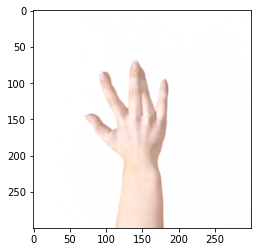

(300, 300, 4)


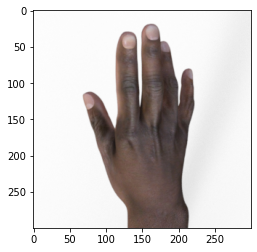

(300, 300, 4)


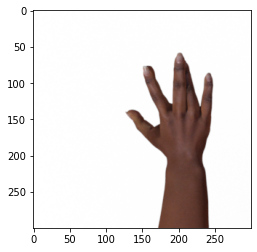

(300, 300, 4)


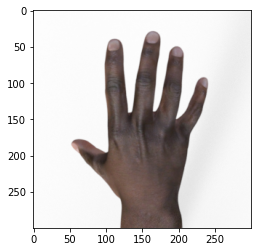

(300, 300, 4)


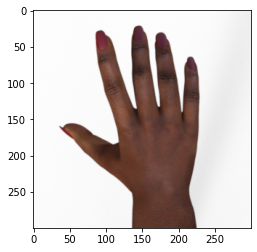

(300, 300, 4)


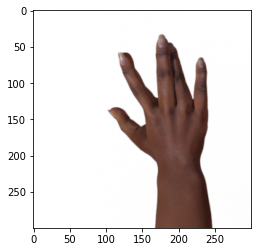

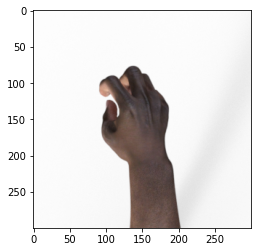

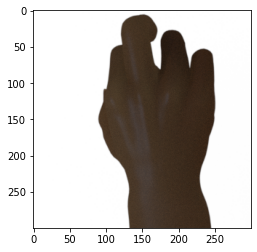

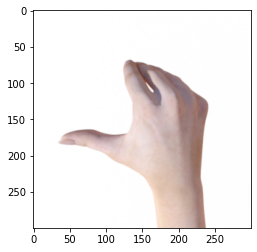

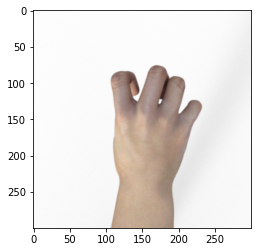

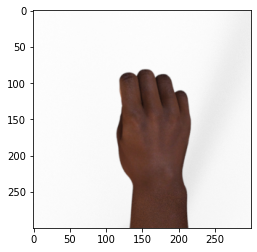

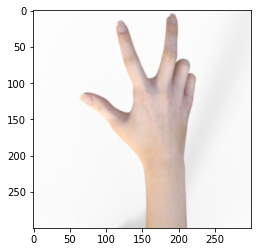

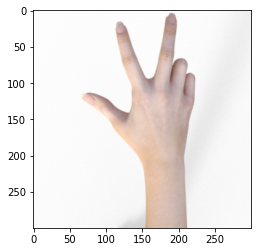

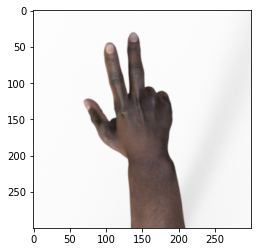

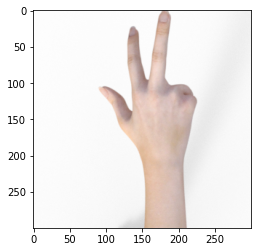

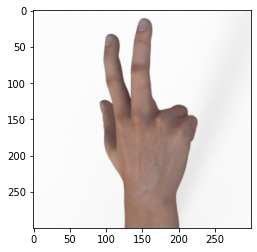

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image
from PIL import Image

index = 2

# if I want to plot differtn figgure horuzantalii this is the way 




for i in paper_list[0:6]:
 # fig = plt.figure(figsize=(6,6))
  path_image = os.path.join(paper_dir, i)
  image_np = image.imread(path_image)
  print(image_np.shape)
 # axs = fig.add_subplot(2,3,1)
  lis_plt =  plt.imshow(image_np)
  plt.show()



for i in rock_list[:5]:
 # fig = plt.figure(figsize=(4,1))
  path_image = os.path.join(rock_dir, i)
  image_np = image.imread(path_image)
  plt.imshow(image_np)
  plt.show()

  
for i in scissors_list[:5]:
 # fig = plt.figure(figsize=(4,1))
  path_image = os.path.join(scissors_dir, i)
  image_np = image.imread(path_image)
  plt.imshow(image_np)
  plt.show()








  


In [ ]:
##spilit train and 

print("the total len is " , len(paper_list), " ",len(rock_list), " ", len(scissors_list))

split = 672
train_paper =  paper_list[:split]
test_paper = paper_list[split:]

train_rock = rock_list[:split]
test_rock = rock_list[split:]

train_scissors = scissors_list[:split]
test_scissors = scissors_list[split:]

print("train is ", len(train_paper), "test  is ", len(test_paper))






the total len is  840   840   840
train is  672 test  is  168


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape = [300, 300, 3], activation =  "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation =  "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.4),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")


])



model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = "rmsprop", metrics = ["accuracy"])



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_gen.flow_from_directory(base_dir,
                                                batch_size = 24,
                                                target_size = (300, 300),
                                                class_mode = "categorical"
                                                )





Found 2520 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator, epochs = 10)

Epoch 1/10
105/105 [==============================] - 513s 5s/step - loss: 3.7373 - accuracy: 0.6651
Epoch 2/10
105/105 [==============================] - 490s 5s/step - loss: 0.5297 - accuracy: 0.9218
Epoch 3/10
105/105 [==============================] - 480s 5s/step - loss: 0.3787 - accuracy: 0.9766
Epoch 4/10
105/105 [==============================] - 479s 5s/step - loss: 0.2314 - accuracy: 0.9762
Epoch 5/10
105/105 [==============================] - 480s 5s/step - loss: 0.7109 - accuracy: 0.9829
Epoch 6/10
105/105 [==============================] - 490s 5s/step - loss: 0.4208 - accuracy: 0.9750
Epoch 7/10
105/105 [==============================] - 487s 5s/step - loss: 1.3536 - accuracy: 0.9829
Epoch 8/10
105/105 [==============================] - 494s 5s/step - loss: 0.5446 - accuracy: 0.9861
Epoch 9/10
105/105 [==============================] - 480s 5s/step - loss: 0.1174 - accuracy: 0.9897
Epoch 10/10
105/105 [==============================] - 470s 4s/step - loss: 1.3886 - accura

dict_keys(['loss', 'accuracy'])


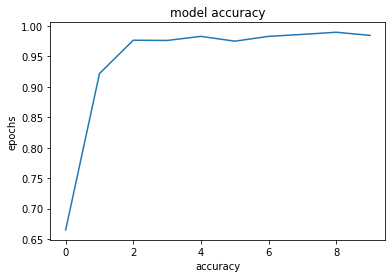

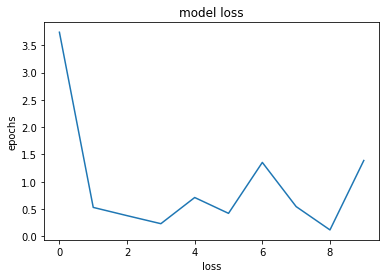

In [ ]:
# list all the data history
print(history.history.keys())
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.show()


plt.plot(history.history["loss"])
#plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()


In [ ]:
## model prediction

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)